# TSP 
## Traveling Salesman Problem
Problem statement : " Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city? "



### Solution using GA 
#### Properties:
- Minimum fitness search algorithm
- Hybrid between SteadyState and Elitism GA
- Binomial function for mutation
- Graph plotting

#### Implementation of GA class :

In [8]:
from Chromosome import Chromosome
from random import randint as rnd

class GeneticAlgorithm:
    
    def __init__(self, ga_parameters_input, chromosome_parameters_input):
        """
            ga_parameters keys : population_size, evaluation_function 
            chromosome_parameters keys : number_of_nodes
            :param ga_parameters_input: Dictionary
            :param chromosome_parameters_input: Dictionary
        """
        self.__chromosome_parameters = chromosome_parameters_input
        self.__ga_parameters = ga_parameters_input
        self.__population = []
        
    @property
    def population(self):
        return self.__population
    
    def initialisation(self):
        """
            Initializes the population for the first generation
        """
        for _ in range(self.__ga_parameters['population_size']):
            c = Chromosome(self.__chromosome_parameters)
            self.__population.append(c)
            
    def evaluation(self):
        """
            Evaluates every chromosome in the current population
                (sets the fitness)
        """
        for chromosome in self.__population:
            chromosome.fitness = self.__ga_parameters['evaluation_function'](chromosome.representation)
            
    def evaluate_one(self, chromosome):
        """
            Evaluates the given chromosome (sets the fitness)
            :param chromosome: Chromosome 
        """
        chromosome.fitness = self.__ga_parameters['evaluation_function'](chromosome.representation)
    
    def best_chromosome(self):
        """
            Returns the best chromosome in the current population
            :return: Chromosome
        """
        best = self.__population[0]
        for chromosome in self.__population:
            if chromosome.fitness < best.fitness:
                best = chromosome
        return best
    
    def worst_chromosome(self):
        """
            Returns the worst chromosome in the current population
            :return: Chromosome
        """
        worst = self.__population[0]
        for chromosome in self.__population:
            if chromosome.fitness > worst.fitness:
                worst = chromosome
        return worst
    
    def selection(self):
        """
            Returns a chromosome from the current population
            :return: Chromosome 
        """
        #TODO: better selection
        max_elem = sum(chromosome.fitness for chromosome in self.__population)
        pick = random.uniform(0, max_elem)
        current = 0
        for chromosome in self.__population:
            current += chromosome.fitness
            if current > pick:
                return chromosome
            
    def __get_best_2_chromosomes(self, new_pop):
        best1 = Chromosome(self.__chromosome_parameters)
        best1.fitness = 999999999
        best2 = Chromosome(self.__chromosome_parameters)
        best2.fitness = 999999999
        for el in new_pop:
            if best1.fitness > el.fitness:
                best1 = el
            elif best2.fitness > el.fitness: 
                best2 = el
        return best1, best2
    
    def next_generation(self):
        """
            Creates the next generation by crossing over chromosomes 
                from the current population and mutating them
        """
        new_population = []
        for _ in range(round(self.__ga_parameters['population_size'] / 2)):
            chromosome_1 = self.selection()
            chromosome_2 = self.selection()
            offspring_1 = chromosome_1.crossover(chromosome_2)
            offspring_2 = chromosome_2.crossover(chromosome_1)
            offspring_1.mutation()
            offspring_2.mutation()
            self.evaluate_one(offspring_1)
            self.evaluate_one(offspring_2)
            best1, best2 = self.__get_best_2_chromosomes([chromosome_1, chromosome_2, offspring_1, offspring_2])
            new_population.append(best1)
            new_population.append(best2)
        while len(new_population) < self.__ga_parameters['population_size']:
            new_population.append(self.best_chromosome())
        while len(new_population) > self.__ga_parameters['population_size']:
            new_population.pop(-1)
        self.__population = new_population
            
        # next_population = [self.best_chromosome()]
        # for _ in range(self.__ga_parameters['population_size'] - 1):
        #     #TODO: better selection (no two identical chromosomes)
        #     chromosome_1 = self.selection()
        #     chromosome_2 = self.selection()
        #     offspring = chromosome_1.crossover(chromosome_2)
        #     offspring.mutation()
        #     self.evaluate_one(offspring)
        #     worst_chromosome = self.worst_chromosome()
        #     if offspring.fitness > worst_chromosome.fitness:
        #         offspring = worst_chromosome
        #     next_population.append(offspring)
        # self.__population = next_population
        # random.shuffle(self.__population)
        # my_new_pop=[]
        # for el in range(0,len(self.__population)-1,2):
        #     c1=self.__population[el]
        #     c2=self.__population[el+1]
        #     newOff=c1.crossover(c2)
        #     newOff.mutation()
        #     self.evaluate_one(newOff)
        #     my_new_pop.append(c1)
        #     my_new_pop.append(c2)
        #     my_new_pop.append(newOff)
        # 
        # my_new_pop=sorted(my_new_pop, key= lambda chromo: chromo.fitness)
        # n=self.__ga_parameters['population_size'] / 2
        # i=0
        # while i<n:
        #     my_new_pop.pop(-1)
        #     i+=1
        # self.__population=my_new_pop



#### Fitness calculation function:

In [9]:
def get_fitness(representation):
    """
        Gets a certain representation from a chromosome and returns its
            fitness by calculating the sum of the edges
        :param representation: Array of integers 
        :return: Integer
    """
    fitness = 0
    matrix = network['matrix']
    for k in range(len(representation) - 1):
        node_1 = representation[k]
        node_2 = representation[k + 1]
        fitness += matrix.item((node_1, node_2))
    # adding the distance from the last node back to the first one to close the circuit
    node_1 = representation[len(representation) - 1] #last node
    node_2 = representation[0] #first node
    fitness += matrix.item((node_1, node_2))
    return fitness



#### Read network function:

In [10]:
def read_network(file_name_input):
    """
        Reads the network found in file_name
        :param file_name_input: String
        :return: Dictionary
    """
    file = open(file_name_input, "r")
    network_dictionary = {}
    number_of_nodes = int(file.readline())
    network_dictionary['number_of_nodes'] = number_of_nodes
    matrix = []
    for i in range(number_of_nodes):
        line = file.readline()
        line_array = line.split(',')
        matrix.append([])
        for j in range(len(line_array)):
            value = int(line_array[j])
            matrix[i].append(value)
    network_dictionary['matrix'] = matrix
    
    return network_dictionary

import tsplib95 as tsp

def read_tsp_file(file_name_input):
    tsp_problem = tsp.load_problem(file_name_input)
    G = tsp_problem.get_graph()
    n=len(G.nodes())
    network = {}
    network['number_of_nodes']=n
    matrix=nx.to_numpy_matrix(G)
    
    network['matrix']=matrix
    return network

#### The initializations of the variables

In [11]:
import random
import networkx as nx

random.seed()

file_name = "berlin52.txt"
network = read_tsp_file(file_name)
ga_parameters = {'population_size' : 100, 'number_of_generations' : 1000, 'evaluation_function' : get_fitness}
chromosome_parameters = {'number_of_nodes' : network['number_of_nodes']}

#### The graph:

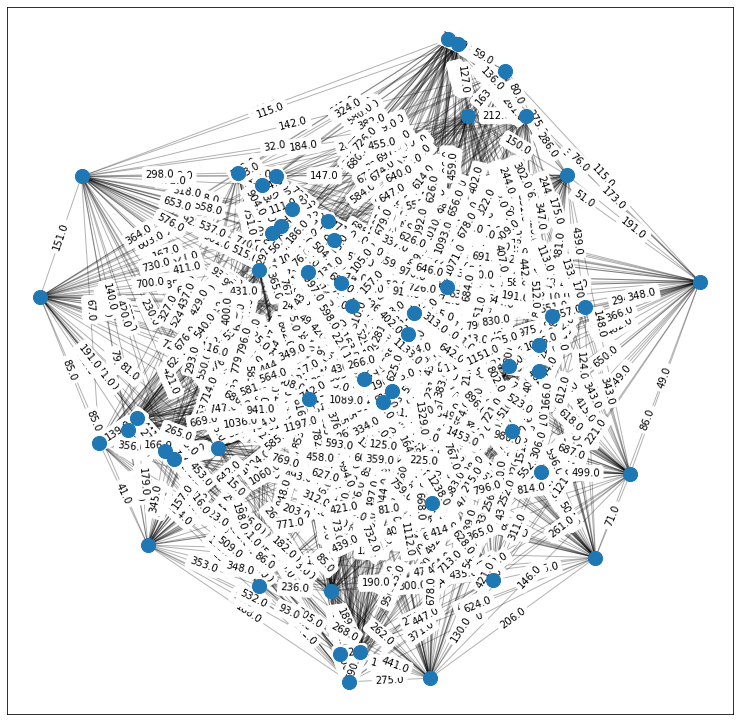

In [12]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 
import warnings 

warnings.simplefilter('ignore')

A = np.matrix(network['matrix'])
G=nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(13, 13)) # image is 8 x 8 inches
nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.RdYlBu)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
plt.show(G)

### Application of the GA:

In [13]:
best_solution_representation = []
best_solution_fitness = 999999

GA = GeneticAlgorithm(ga_parameters, chromosome_parameters)
GA.initialisation()
GA.evaluation()

for generation_number in range(ga_parameters['number_of_generations']):
    best_chromosome_representation = GA.best_chromosome().representation
    best_chromosome_fitness = GA.best_chromosome().fitness
    if best_chromosome_fitness < best_solution_fitness:
        best_solution_fitness = best_chromosome_fitness
        best_solution_representation = best_chromosome_representation
    print('Generation : ' + str(generation_number) + ' -- representation : ' + str(best_chromosome_representation) + ' -- fitness : ' + str(best_chromosome_fitness))
    GA.next_generation()
    GA.evaluation()
print("\n ----------- Solution -------------\n")
print('Solution representation : ' + str(best_solution_representation) + ' -- fitness : ' + str(best_solution_fitness))


Generation : 0 -- representation : [0, 38, 32, 23, 11, 3, 12, 27, 37, 33, 47, 51, 13, 50, 31, 28, 49, 16, 48, 42, 17, 2, 41, 20, 45, 22, 19, 46, 29, 43, 24, 5, 15, 21, 35, 34, 36, 4, 1, 26, 10, 39, 25, 40, 18, 8, 30, 14, 44, 7, 6, 9] -- fitness : 24264.0
Generation : 1 -- representation : [0, 38, 32, 23, 11, 3, 12, 27, 37, 33, 47, 51, 13, 50, 31, 28, 49, 16, 48, 42, 17, 2, 41, 20, 45, 22, 19, 46, 29, 43, 24, 5, 15, 21, 35, 34, 36, 4, 1, 26, 10, 39, 25, 40, 18, 8, 30, 14, 44, 7, 6, 9] -- fitness : 24264.0
Generation : 2 -- representation : [0, 9, 33, 27, 47, 37, 3, 31, 11, 50, 51, 12, 13, 38, 23, 32, 28, 49, 16, 48, 44, 42, 17, 2, 41, 20, 45, 22, 19, 46, 29, 43, 24, 5, 15, 21, 35, 34, 36, 4, 1, 26, 10, 39, 25, 40, 18, 8, 30, 14, 7, 6] -- fitness : 23650.0
Generation : 3 -- representation : [0, 23, 3, 12, 27, 37, 33, 47, 51, 13, 50, 31, 26, 45, 28, 49, 16, 48, 42, 17, 41, 20, 22, 19, 46, 5, 29, 43, 24, 15, 21, 35, 34, 36, 4, 10, 39, 25, 38, 40, 32, 11, 2, 1, 18, 8, 30, 14, 44, 7, 6, 9] -

#### Solution graph

In [14]:
warnings.simplefilter('ignore')

#make a matrix from best_solution_representation
new_matrix = []
for i in range(chromosome_parameters['number_of_nodes']):
    new_matrix.append([])
    for j in range(chromosome_parameters['number_of_nodes']):
        new_matrix[i].append(0)
    
for i in range(len(best_solution_representation) - 1): 
    pos1 = best_solution_representation[i]
    pos2 = best_solution_representation[i + 1]
    new_matrix[pos1][pos2] = network['matrix'][pos1][pos2]
    new_matrix[pos2][pos1] = network['matrix'][pos2][pos1]
pos1 = best_solution_representation[-1]
pos2 = best_solution_representation[0]
new_matrix[pos1][pos2] = network['matrix'][pos1][pos2]
new_matrix[pos2][pos1] = network['matrix'][pos2][pos1]
#end of making new matrix

A = np.matrix(new_matrix)
G=nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(13, 13)) # image is 8 x 8 inches
nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.RdYlBu)
#adding edge weights
for i in range(len(new_matrix)):
    for j in range(i + 1, len(new_matrix)):
        if new_matrix[i][j] != 0:
            G.add_edge(i, j, weight = new_matrix[i][j])
labels = nx.get_edge_attributes(G, 'weight')
#end of adding edge weights

nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
plt.show(G)


IndexError: index 20 is out of bounds for axis 0 with size 1